# Logistic Regression

En éste notebook vamos a ver la implementación en NumPy del modelo de regresión logística mediante gradient descent, usando los resultados obtenidos de la teoría. Por último, se computarán las métricas para medir el rendimiento del modelo.

## Cargamos las Librerías

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

In [2]:
import sys  
#sys.path.insert(0, '../../clase_3/ejercicios/src')

## Cargamos el Dataset

In [3]:
class Data(object):

    def __init__(self, path):
        self.dataset = self._build_dataset(path)

    def _build_dataset(self, path):
        structure = [('x_1', float),
                     ('x_2', float),
                     ('y', float)]

        with open(path, encoding="utf8") as data_csv:
            data_gen = ((float(line.split(',')[0]), float(line.split(',')[1]), float(line.split(',')[2]))
                        for i, line in enumerate(data_csv) if i != 0)
            embeddings = np.fromiter(data_gen, structure)

        return embeddings

    def split(self, percentage):
        X = np.array([self.dataset['x_1'], self.dataset['x_2']]).T
        y = self.dataset['y']

        permuted_idxs = np.random.permutation(X.shape[0])

        train_idxs = permuted_idxs[0:int(percentage * X.shape[0])]

        test_idxs = permuted_idxs[int(percentage * X.shape[0]): X.shape[0]]

        X_train = X[train_idxs]
        X_test = X[test_idxs]

        y_train = y[train_idxs]
        y_test = y[test_idxs]

        return X_train, X_test, y_train, y_test

In [4]:
dataset = Data('data/dataset.txt')
X_train, X_test, y_train, y_test = dataset.split(0.8)

print('Formato del dataset: {}'.format(X_train.shape))

Formato del dataset: (79, 2)


In [5]:
X_test.shape

(20, 2)

In [6]:
print(X_test[:10, :])

[[39.53833914 76.03681085]
 [80.27957401 92.11606081]
 [75.39561147 85.75993667]
 [69.07014406 52.74046973]
 [80.366756   90.9601479 ]
 [79.94481794 74.16311935]
 [75.47770201 90.424539  ]
 [35.28611282 47.02051395]
 [91.5649745  88.69629255]
 [50.53478829 48.85581153]]


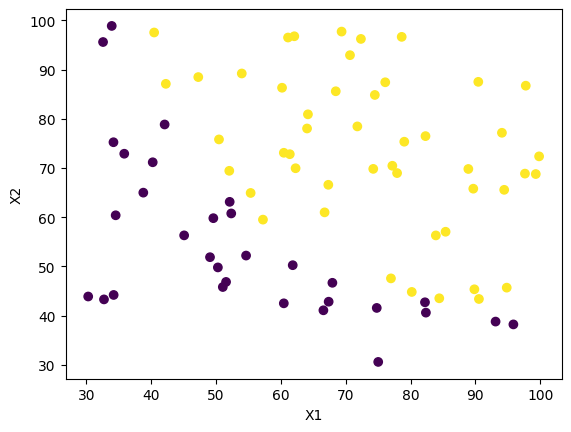

In [7]:
# Observamos los datos
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [8]:
# escalamos los datos de entrada.Es importante para evitar poblemas numéricos como overflow.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
X_train[:5, :]

array([[ 0.32904482,  1.62894729],
       [-0.29942683,  1.0900962 ],
       [-1.22534544,  1.13330075],
       [ 0.9535087 , -1.2336608 ],
       [ 0.5683812 , -1.0140485 ]])

In [10]:
X_test[:5, :]

array([[-1.36605329,  0.5320847 ],
       [ 0.73892305,  1.40558864],
       [ 0.48658348,  1.06029271],
       [ 0.15976572, -0.73348713],
       [ 0.74342748,  1.34279376]])

## Regresión Logística

## Implementación de Building Blocks del Modelo

A continuación, se deberán implementar paso a paso los distintos bloques de código que conforman el modelo, junto con algunas funciones auxiliares.

### Función Sigmoid

Implementar la función: $g(z) = \frac{1}{1 + e^{-z}}$ en NumPy

In [11]:
# TODO

### Binary Cross Entropy

Implementar la función de costo: $J(w) = \frac{1}{n}\sum_{i=1}^{n}L\left ( \hat{y},y \right )= \frac{1}{n}\sum_{i=1}^{n}\left [y^{(i)}log(\hat{y}^{(i)})+ (1-y^{(i)})log(1-\hat{y}^{(i)}) \right ]$

In [12]:
# TODO

### Gradiente

Implementar el gradiente de la función costo respecto de los parámetros: $\frac{\partial J(w)}{\partial w} = \frac{1}{n}\sum_{i=1}^{n}\left ( \hat{y}^{i}-y^{i}\right )\bar{x}^i$

In [13]:
# prediccion

# error

# suma de gradiente

# promedio

# transponer (depende de su implementación)

# ¿todo junto?



### Implementar función fit

Utilizas los bloques anteriores, junto con la implementación en NumPy del algoritmo Mini-Batch gradient descent, para crear la función fit de nuestro modelo de regresión logística. Cada un determinado número de epochs calculen el loss, almacénenlo en una lista y hagan un log de los valores. La función debe devolver los parámetros ajustados.

In [14]:
# TODO
def fit(self, X, y, lr, b, epochs, bias=True):
    # si decidimos utilizar bias, agregamos como siempre una columna con '1' al dataset de entrada
    if bias:
        X = np.hstack((np.ones((X.shape[0], 1)), X))

    # inicializamos aleatoriamente los pesos

    
    loss_list = []

    # corremos Mini-Batch para optimizar los parámetros
    for j in #...:
        idx = np.random.permutation(X.shape[0])
        X_train = X[idx]
        y_train = y[idx]

        for i in range(0, len(X_train), batch_size):
            # Seleccionar los elementos del batch actual
            end = #notimplemented
            batch_X = X_train[i: end]
            batch_y = y_train[i: end]

            # cálculo de predicciones
            prediction = #...
            # cálculo del error
            error = prediction.reshape(-1, 1) - batch_y.reshape(-1, 1)
            # cálculo del grandiente
            grad_sum = np.sum(error * batch_X, axis=0)
            grad_mul = 1 / batch_size * grad_sum
            gradient = np.transpose(grad_mul).reshape(-1, 1)
            #actualizar pesos
            W = #...
    self.model = W
    return NotImplemented

SyntaxError: invalid syntax (3335014016.py, line 13)

## Implementación completa

In [15]:
class LogisticRegression():
    
    # definimos la función sigmoid para entrenamiento y las predicciones
    def sigmoid(self,x):
            return 1 / (1 + np.exp(-x))

    # definimos la función loss para reportarla cada cierta cantidad de epochs
    def loss(self, y, y_hat):
        loss = np.mean(-y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
        return loss 

    def fit(self, X, y, lr, b, epochs, bias=True, log=100, verbose=True):

        # si decidimos utilizar bias, agregamos como siempre una columna con '1' al dataset de entrada
        if bias:
            X = np.hstack((np.ones((X.shape[0], 1)), X))

        # inicializamos aleatoriamente los pesos
        m = X.shape[1]
        W = np.random.randn(m).reshape(m, 1)

        loss_list = []
        
        # corremos Mini-Batch para optimizar los parámetros
        for j in range(epochs):
            idx = np.random.permutation(X.shape[0])
            X_train = X[idx]
            y_train = y[idx]
            batch_size = int(len(X_train) / b)

            for i in range(0, len(X_train), batch_size):
                end = i + batch_size if i + batch_size <= len(X_train) else len(X_train)
                batch_X = X_train[i: end]
                batch_y = y_train[i: end]

                prediction = self.sigmoid(np.sum(np.transpose(W) * batch_X, axis=1))
                error = prediction.reshape(-1, 1) - batch_y.reshape(-1, 1)
                grad_sum = np.sum(error * batch_X, axis=0)
                grad_mul = 1 / batch_size * grad_sum
                gradient = np.transpose(grad_mul).reshape(-1, 1)

                W = W - (lr * gradient)
            
            l_epoch = self.loss(y_train, self.sigmoid(np.dot(X_train, W)))
            loss_list.append(l_epoch)
            if verbose:
                if j%log==0:
                    print("Epoch: {}, Loss: {}".format(j, l_epoch))
                
        self.model = W
        self.losses = loss_list

    def predict(self, X, threshold=0.5):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        p = self.sigmoid(X @ self.model)
        mask_true = p >= threshold
        mask_false = p < threshold
        p[mask_true] = 1
        p[mask_false] = 0
        return p
    
    def predict_proba(self, X):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        p = self.sigmoid(X @ self.model)
        return p

In [17]:
# Seleccionar hiperparámetros
lr = 0.1
b = 16
epochs = 1000
bias = True

# Hacer el fit del modelo con los HPs seleccionados
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train.reshape(-1, 1), lr, b, epochs, bias, log=5)
print(logistic_regression.model)
predictions = logistic_regression.predict(X_test)

Epoch: 0, Loss: 0.5159885852866511
Epoch: 5, Loss: 0.3088101993192035
Epoch: 10, Loss: 0.2724420339497254
Epoch: 15, Loss: 0.25606306626563824
Epoch: 20, Loss: 0.24675568418578708
Epoch: 25, Loss: 0.24083272161509187
Epoch: 30, Loss: 0.23684410230871586
Epoch: 35, Loss: 0.23389205745299144
Epoch: 40, Loss: 0.231779290122122
Epoch: 45, Loss: 0.2302086420752708
Epoch: 50, Loss: 0.2289952500269937
Epoch: 55, Loss: 0.22802951328683246
Epoch: 60, Loss: 0.22727177132580656
Epoch: 65, Loss: 0.22669334166254956
Epoch: 70, Loss: 0.22618544983489494
Epoch: 75, Loss: 0.22577594275646107
Epoch: 80, Loss: 0.22546406515036696
Epoch: 85, Loss: 0.22518656322097327
Epoch: 90, Loss: 0.2249696586790361
Epoch: 95, Loss: 0.22476845946744656
Epoch: 100, Loss: 0.22461769883618785
Epoch: 105, Loss: 0.22449031935765654
Epoch: 110, Loss: 0.22437120573526126
Epoch: 115, Loss: 0.2242904837815107
Epoch: 120, Loss: 0.22420804860724647
Epoch: 125, Loss: 0.22413657355915262
Epoch: 130, Loss: 0.22409633683165145
Epoch

### Decision Boundary

En los casos donde tengamos dos o tres features en el dataset, podemos graficar la línea de decisión (plano para 3 features) que aplica el modelo para clasificar las muestras bajo una u otra clase. La derivación surge de la fórmula lineal que se utiliza en la sigmoid:

$\hat{y}\geq 0.5 \to 1$ 

$\hat{y}<0.5 \to 0$

Teniendo en cuenta la función sigmoid:

$\hat{y}\geq 0.5 \Leftrightarrow w^{T}x + b \geq 0$

Por lo que la decision boundary es:

$w^{T}x + b \geq 0$


Igualando a la ecuación de una recta en 2D, donde la abcisa es $X_1$ y la ordenada $X_2$:

$w_1x_1 + w_2x_2 + w_0 = mx_1 + c$

$w_1x_1 + w_2x_2 + w_0 = 0 $

$w_1x_1 + w_2mx_1+w_2c + w_0 = 0$

$x_1 = 0 \to w_2c + w_0 = 0$ 

$c = -w_0/w_2$

Reemplazando $c$:

$w_1x_1 + w_2mx_1 = 0$

$w_1x_1 = -w_2mx_1$

$m = -w_1/w_2$

In [18]:
# Calculamos el slope e intercept para graficar
slope = -(logistic_regression.model[1] / logistic_regression.model[2])
intercept = -(logistic_regression.model[0] / logistic_regression.model[2])

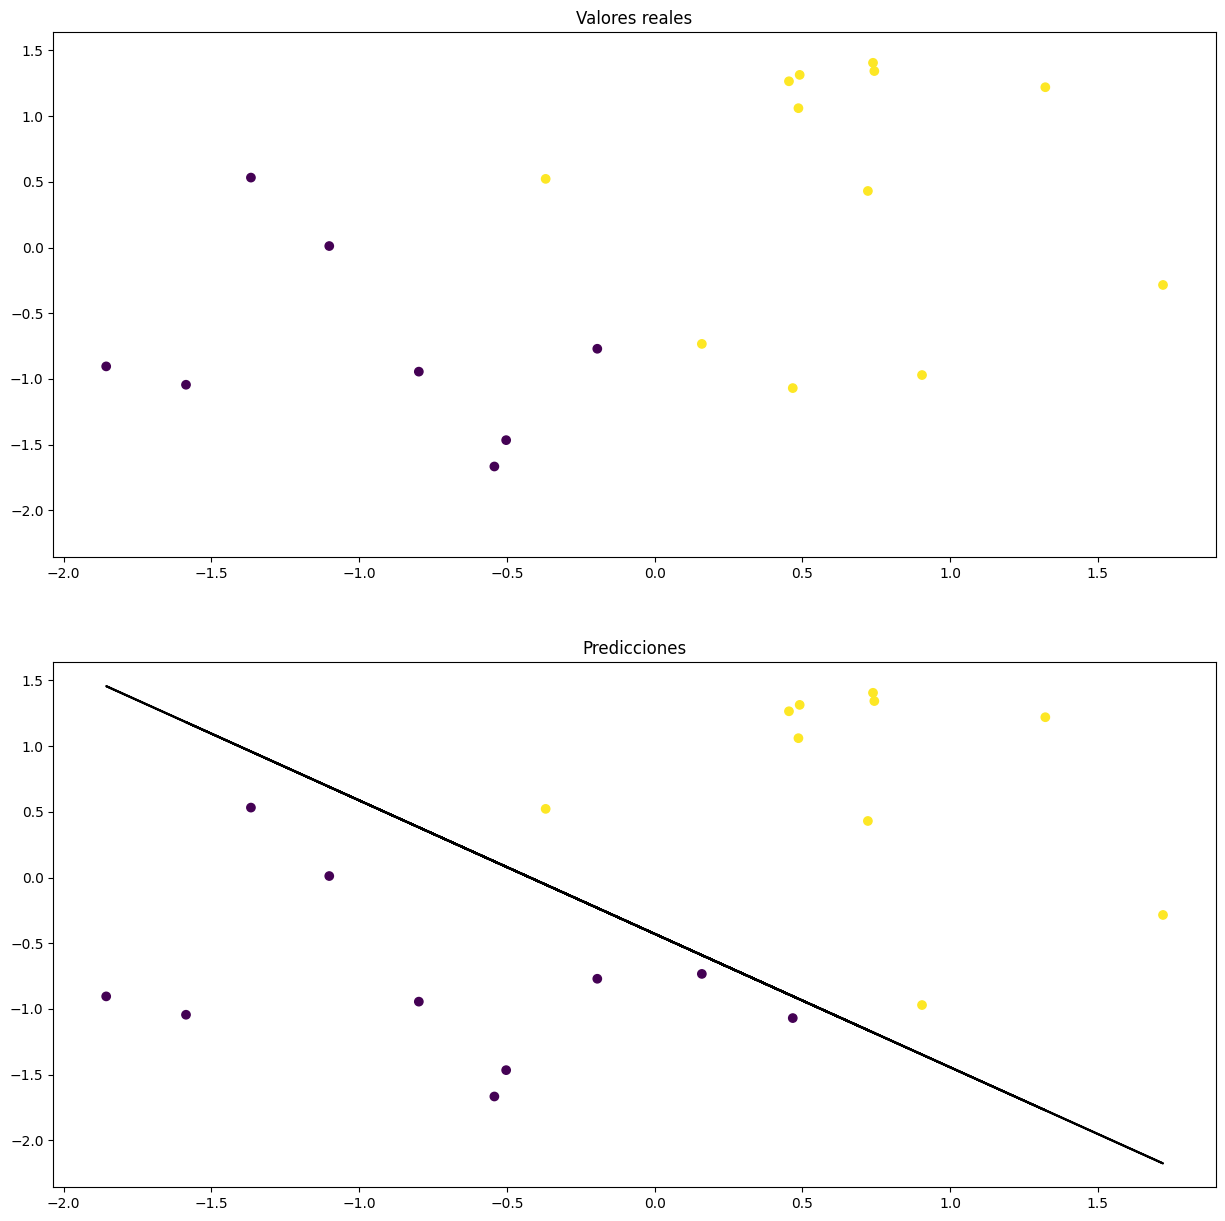

In [19]:
# Graficos
f, (ax, bx) = plt.subplots(2, 1, sharey='col', figsize=(15, 15))

ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
ax.set_title('Valores reales')

bx.scatter(X_test[:, 0], X_test[:, 1], c=predictions[:, 0])
y_vals = intercept + (slope * X_test[:, 0])
bx.plot(X_test[:, 0], y_vals, c="k")
bx.set_title('Predicciones')

plt.show()

### Calculamos las métricas

In [20]:
predictions.shape

(20, 1)

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [22]:
confusion_matrix(y_test, predictions)

array([[ 8,  0],
       [ 2, 10]])

In [23]:
metrics = [accuracy_score, precision_score, recall_score]
results = {}
for metric in metrics:
    name = metric.__class__.__name__
    results[name] = metric(y_test, predictions[:, 0])
    print('{metric}: {value}'.format(metric=name, value=results[name]))

function: 0.9
function: 1.0
function: 0.8333333333333334


### K-folds para selección de hiperparámetros

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
def k_folds(X_train, y_train, lr, b, epochs, bias=True, k=5, verbose=False):
    
    # Definimos el modelo a emplear
    l_regression = LogisticRegression()

    # Definimos una métrica

    chunk_size = int(len(X_train) / k)
    acc_list = []

    for i in range(0, len(X_train), chunk_size):
        end = i + chunk_size if i + chunk_size <= len(X_train) else len(X_train)
        new_X_valid = X_train[i: end]
        new_y_valid = y_train[i: end]
        new_X_train = np.concatenate([X_train[: i], X_train[end:]])
        new_y_train = np.concatenate([y_train[: i], y_train[end:]])

        l_regression.fit(new_X_train, new_y_train, lr, b, epochs, bias, verbose=verbose)
        prediction = l_regression.predict(new_X_valid)
        k_error = accuracy_score(new_y_valid, prediction)
        acc_list.append(k_error)
        # print("Modelo {i} de {k}, Métrica: {error}".format(i=i/chunk_size, k=k, error=k_error))
        
    mean_acc = np.mean(acc_list)

    return mean_acc

In [30]:
# K-Folds para determinación del learning rate

lr_list = np.linspace(0.001, 0.5, 10)
kfolds_lr = np.zeros(lr_list.shape)

for i, lr in enumerate(lr_list):
    kfolds_lr[i] = k_folds(X_train, y_train.reshape(-1, 1), lr, 16, 1000)

best_lr = lr_list[np.argmax(kfolds_lr)]

In [31]:
best_lr

0.001

In [32]:
colname = ['learning_rate', 'kfolds_mean']
lr_df = pd.DataFrame(np.column_stack([lr_list, kfolds_lr]),columns=colname)

In [33]:
lr_df.head(2)

,learning_rate,kfolds_mean
0,0.001000,0.911111
1,0.056444,0.911111


In [34]:
lr_df.describe()

,learning_rate,kfolds_mean
count,10.000000,10.000000
mean,0.250500,0.910000
std,0.167866,0.003514
min,0.001000,0.900000
25%,0.125750,0.911111
50%,0.250500,0.911111
75%,0.375250,0.911111
max,0.500000,0.911111


In [35]:
# K-Folds para determinación del batch
batch_list = np.linspace(1, 30, 30)
kfolds_b = np.zeros(batch_list.shape)

for i, b in enumerate(batch_list):
    kfolds_b[i] = k_folds(X_train, y_train.reshape(-1, 1), best_lr, b, 1000)

best_b = batch_list[np.argmax(kfolds_b)]

In [36]:
best_b

8.0

In [37]:
colname = ['batch', 'kfolds_mean']
batch_df = pd.DataFrame(np.column_stack([batch_list, kfolds_b]),columns=colname)

In [38]:
batch_df.head(20)

,batch,kfolds_mean
0,1.0,0.505556
1,2.0,0.658333
2,3.0,0.791667
3,4.0,0.691667
4,5.0,0.780556
5,6.0,0.822222
6,7.0,0.877778
7,8.0,0.911111
8,9.0,0.888889
9,10.0,0.888889


In [39]:
batch_df.describe()

,batch,kfolds_mean
count,30.000000,30.000000
mean,15.500000,0.863519
std,8.803408,0.093239
min,1.000000,0.505556
25%,8.250000,0.888889
50%,15.500000,0.900000
75%,22.750000,0.911111
max,30.000000,0.911111
